In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pickle
import joblib

In [8]:
data = pd.read_csv('./house_price.csv')
df = pd.DataFrame(data)
df = df[["Price","Bedrooms","Bathrooms","Sqft_living"]]
df.dropna(inplace=True)

In [9]:
X = df.drop('Price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,df.Price,test_size=0.2,random_state=5)

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

In [11]:
pred_df = pd.DataFrame(y_test_pred,y_test)

In [12]:
mse = mean_squared_error(y_test,y_test_pred)
mse

66048634725.11505

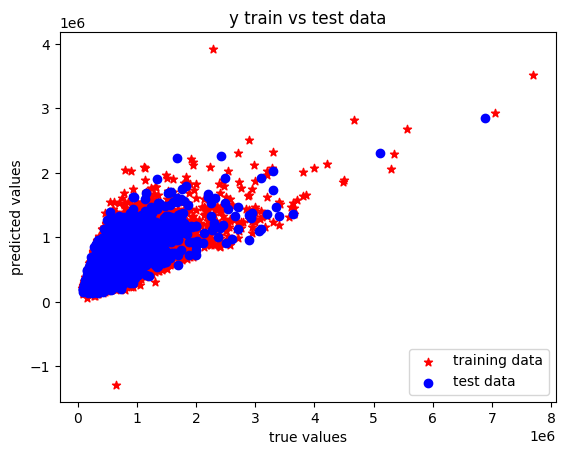

In [13]:
plt.scatter(y_train,y_train_pred,color="red",marker="*",label="training data")
plt.scatter(y_test,y_test_pred,color="blue",marker="o",label="test data")
plt.title("y train vs test data")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.legend(loc="lower right")
plt.plot()
plt.show()

### Using Pickel
1. Save Model
2. Load Model

In [14]:
with open('model_pickel','wb') as f:
    pickle.dump(lin_reg,f)

In [ ]:
with open('model_pickel','rb') as f:
    model_pickel = pickle.load(f)
model_pickel.coef_

array([-56727.36804137,   9008.17093088,    308.35489372])

### Using Joblib
1. Save Model
2. Load Model

In [16]:
joblib.dump(lin_reg,'model_joblib')

['model_joblib']

In [18]:
model_joblib = joblib.load('model_joblib')
model_joblib.coef_

array([-56727.36804137,   9008.17093088,    308.35489372])